In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

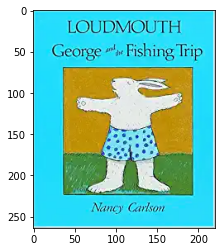

In [11]:
img=cv.imread("book.png")
# img=cv.cvtColor(img, cv.COLOR_BGR2RGB)

#separating r,g,b channels of image
red = img[:,:,2]
green = img[:,:,1]
blue = img[:,:,0]

plt.imshow(img)

In [12]:
result1=np.zeros(shape = (img.shape[0], img.shape[1], 3))   #resultant image
    
#call function separartely on each channel
result1[:,:,2] = medianfilter(red)
result1[:,:,1] = medianfilter(green)
result1[:,:,0] = medianfilter(blue)

#saving image
cv.imwrite('medianfilter.png',result1)


True

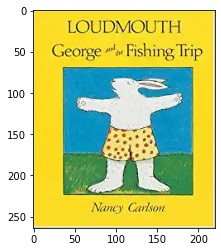

In [13]:
result1=cv.cvtColor(cv.imread("medianfilter.png"), cv.COLOR_BGR2RGB)
plt.imshow(result1)  

In [8]:
def medianfilter(im):
    
    im2=im.copy()
    im = np.pad(im, [(1, 1), (1, 1)], mode='constant') 

    imm=im.copy()
    kernel=[]

    p=1
    q=1

    im2p=0
    im2q=0
    for i in range (im2.size):
        
            for ii in range (p-1,p+2):
                for jj in range (q-1,q+2):
#                     print(im[ii][jj])
                    kernel.append(im[ii][jj])


#             print(kernel)
            median=kernel[4]

            im2[im2p][im2q]=median

            im2p=im2p
            im2q+=1
            if im2q==im2.shape[1]:
                im2p+=1
                im2q=0
            p=p
            q+=1
            if q==im2.shape[1]+1:
                p+=1
                q=1

            kernel=[]
            
    im2=np.clip(im2,0,255)
    return im2

        
        